## Projet detection et suivie d'images
#### Par: Mohamed Taha Sta

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# In my case I got a frozen model from github.

config_file ='misc/54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'misc/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'

In [3]:
model = cv2.dnn.DetectionModel(frozen_model,config_file)

In [4]:
classLabels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5,127.5,127.5)) 
model.setInputSwapRB (True)

< cv2.dnn.Model 0000016B7E215A10>

In [6]:
#read image:
img = cv2.imread("Assets/HappyFam2.jpg")

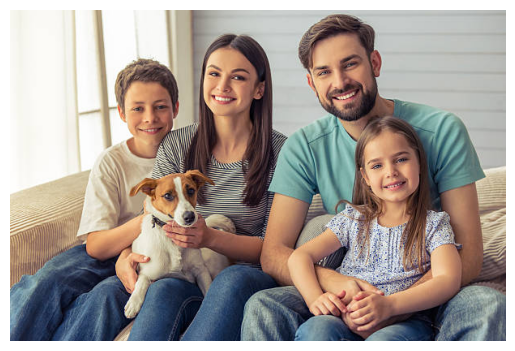

In [7]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
Classindex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [9]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(Classindex.flatten(), confidence.flatten(), bbox):
    (text_width, text_height), baseline = cv2.getTextSize(classLabels[ClassInd], font, fontScale=font_scale, thickness=3)
    cv2.rectangle(img, boxes, (100, 0, 0),2 )
    text_x = boxes[0] 
    text_y = boxes[1] 
    print(classLabels[ClassInd])
    cv2.rectangle(img, (text_x, text_y - text_height), (text_x + text_width, text_y), (100, 0, 200), cv2.FILLED)
    cv2.putText(img, classLabels[ClassInd], (text_x, text_y), font, fontScale=font_scale, color=(100, 0, 0), thickness=3)


person
person
person
person
couch
person
dog


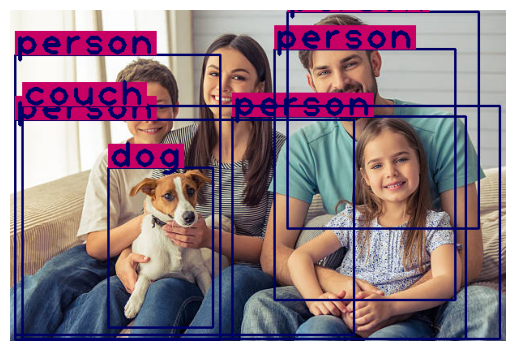

In [10]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
choice = input("For a video Demo press 1\nFor a live Demo from your camera please press 2")

if choice == '1':
    path = "Assets/convoyVideoTest.mp4"
else:
    path = "1"
    
cap = cv2.VideoCapture(path)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError ("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 
   
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc(*'DIVX'), 20.0,(int(cap.get(3)),int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 91:
                # Draw a rectangle around the object
                cv2.rectangle(frame, boxes, (100, 0, 0),2 )
                
                # Draw a colored background behind the text
                (text_width, text_height), baseline = cv2.getTextSize(classLabels[ClassInd], font, fontScale=font_scale, thickness=3)
                text_x = int(boxes[0])
                text_y = int(boxes[1])
                cv2.rectangle(frame, (text_x, text_y - text_height), (text_x + text_width, text_y), (100, 0, 200), cv2.FILLED)
                cv2.putText(frame, classLabels[ClassInd], (text_x, text_y), font, fontScale=font_scale, color=(100, 0, 0), thickness=3)
    cv2.imshow('Press q to exit the Demo !', frame)
    out.write(frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()
